In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1=pd.read_csv('/content/drive/MyDrive/Air Quality dataset(R)/city_day.csv')
df_2=pd.read_csv('/content/drive/MyDrive/Air Quality dataset(R)/city_hour.csv')
df_3=pd.read_csv('/content/drive/MyDrive/Air Quality dataset(R)/station_day.csv')
df_4=pd.read_csv('/content/drive/MyDrive/Air Quality dataset(R)/station_hour.csv')
df_5=pd.read_csv('/content/drive/MyDrive/Air Quality dataset(R)/stations.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_1.shape

(29531, 16)

In [ ]:
df_2.shape

(707875, 16)

In [ ]:
df_3.shape

(108035, 16)

In [ ]:
df_4.shape

(2589083, 16)

In [ ]:
df_5.shape

(230, 5)

In [ ]:
df_1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df_2.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
df_2.dtypes

City           object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [ ]:
df_2['Datetime'] = pd.to_datetime(df_2['Datetime'])

In [ ]:
df_2['Date'] = df_2['Datetime'].dt.date

In [ ]:
df_2 = df_2.drop(['Datetime'], axis = 1)

In [ ]:
merge1 = pd.concat([df_1, df_2], axis = 0)

In [ ]:
merge1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df_3.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
df_4.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [ ]:
df_5.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [ ]:
df_4.dtypes

StationId      object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [ ]:
df_4['Datetime'] = pd.to_datetime(df_4['Datetime'])

In [ ]:
df_4['Date'] = df_4['Datetime'].dt.date

In [ ]:
df_4.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Date
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN,2017-11-24
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN,2017-11-24
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN,2017-11-24
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN,2017-11-24
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN,2017-11-24


In [ ]:
df_4 = df_4.drop(['Datetime'], axis = 1)

In [ ]:
merge2 = pd.concat([df_3, df_4], axis = 0)

In [ ]:
merge2.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
merged3=pd.merge(df_5,merge2,on='StationId')

In [ ]:
merged3.head()

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
# concatenating df1 and df2 along rows
df = pd.concat([merge2, merged3], axis=0)

In [ ]:
df.shape

(5394236, 20)

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,4.055608e+06,3.070320e+06,4.252602e+06,4.303196e+06,4.381620e+06,2.824790e+06,4.369636e+06,3.858354e+06,3.891154e+06,3.608168e+06,3.232100e+06,1.073754e+06,4.211836e+06
mean,8.083958e+01,1.584620e+02,2.280259e+01,3.523706e+01,4.057835e+01,2.870959e+01,1.506863e+00,1.212210e+01,3.806708e+01,3.307723e+00,1.492166e+01,2.447796e+00,1.801555e+02
std,8.896287e+01,1.391309e+02,4.794746e+01,3.476022e+01,5.549671e+01,2.742578e+01,6.221213e+00,1.460536e+01,4.679595e+01,1.210037e+01,3.313765e+01,8.881183e+00,1.400458e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
25%,2.831000e+01,6.410000e+01,3.100000e+00,1.318000e+01,1.145000e+01,1.125000e+01,4.200000e-01,4.280000e+00,1.130000e+01,9.000000e-02,3.500000e-01,0.000000e+00,8.400000e+01
50%,5.275000e+01,1.165000e+02,7.260000e+00,2.490000e+01,2.302000e+01,2.241000e+01,8.000000e-01,8.280000e+00,2.509000e+01,9.700000e-01,3.430000e+00,2.200000e-01,1.310000e+02
75%,9.783000e+01,2.042500e+02,1.893000e+01,4.555000e+01,4.592000e+01,3.780000e+01,1.380000e+00,1.455000e+01,4.939000e+01,3.250000e+00,1.520000e+01,1.850000e+00,2.590000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,4.999900e+02,3.133000e+03


In [ ]:
df.dtypes

StationId       object
Date            object
PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
Benzene        float64
Toluene        float64
Xylene         float64
AQI            float64
AQI_Bucket      object
StationName     object
City            object
State           object
Status          object
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df.isnull().sum())

StationId            0
Date                 0
PM2.5          1338628
PM10           2323916
NO             1141634
NO2            1091040
NOx            1012616
NH3            2569446
CO             1024600
SO2            1535882
O3             1503082
Benzene        1786068
Toluene        2162136
Xylene         4320482
AQI            1182400
AQI_Bucket     1182400
StationName    2697118
City           2697118
State          2697118
Status         2705148
dtype: int64


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(214007, 20)

In [ ]:
print(df.duplicated().sum())

16


In [ ]:
df.drop_duplicates()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650190,WB010,2020-02-14,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70,65.42,59.69,1.84,223.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
2650191,WB010,2020-02-14,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47,57.14,51.31,1.41,222.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
2650192,WB010,2020-02-14,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58,53.71,51.38,1.25,219.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
2650193,WB010,2020-02-14,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28,56.80,56.27,1.21,217.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active


In [ ]:
df.shape

(214007, 20)

<AxesSubplot:>

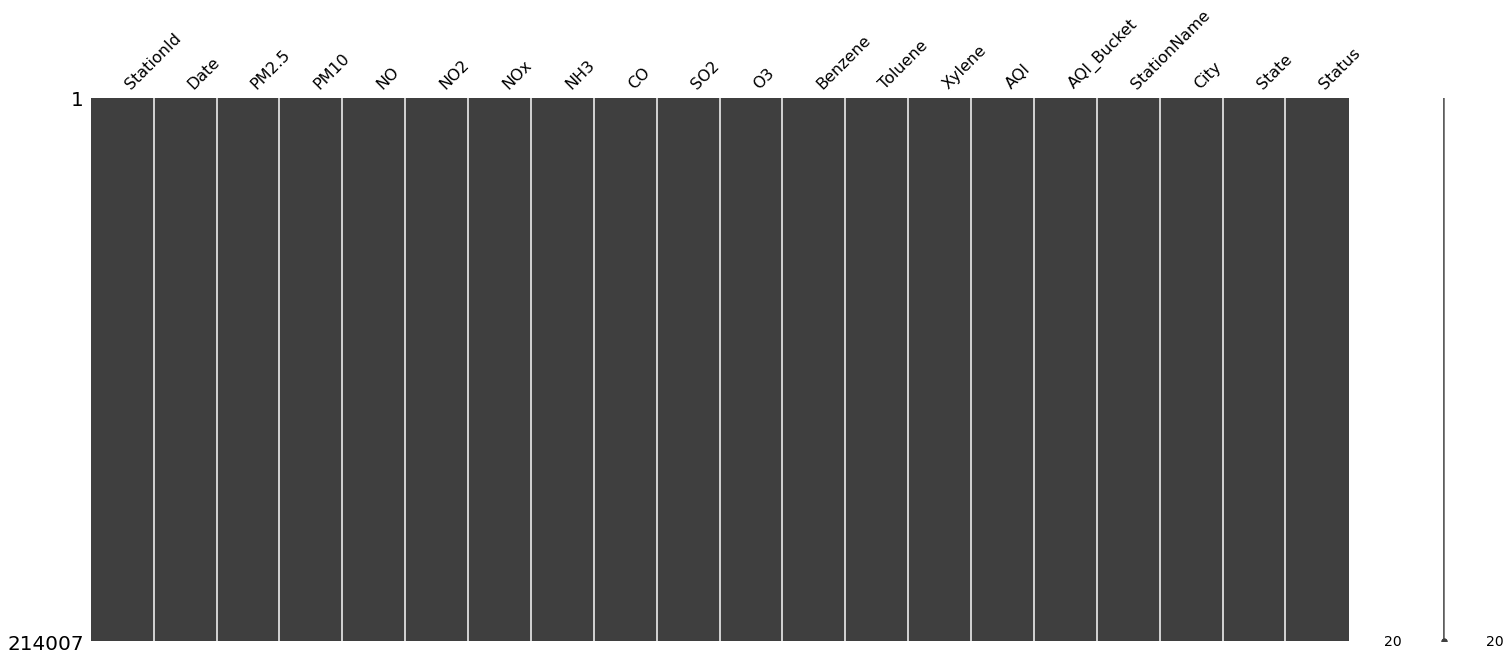

In [ ]:
import missingno as mns
mns.matrix(df)

In [ ]:
df.isna().sum()

StationId      0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket     0
StationName    0
City           0
State          0
Status         0
dtype: int64

In [ ]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [ ]:
df.dtypes

StationId       object
Date            object
PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
Benzene        float64
Toluene        float64
Xylene         float64
AQI            float64
AQI_Bucket      object
StationName     object
City            object
State           object
Status          object
dtype: object

In [ ]:
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

In [ ]:
#df.dropna(subset=['Date'])

In [ ]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
1,AP001,NaN,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,NaN,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,NaN,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,NaN,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,NaN,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214007 entries, 1 to 2650194
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StationId    214007 non-null  object 
 1   Date         0 non-null       float64
 2   PM2.5        214007 non-null  float64
 3   PM10         214007 non-null  float64
 4   NO           214007 non-null  float64
 5   NO2          214007 non-null  float64
 6   NOx          214007 non-null  float64
 7   NH3          214007 non-null  float64
 8   CO           214007 non-null  float64
 9   SO2          214007 non-null  float64
 10  O3           214007 non-null  float64
 11  Benzene      214007 non-null  float64
 12  Toluene      214007 non-null  float64
 13  Xylene       214007 non-null  float64
 14  AQI          214007 non-null  float64
 15  AQI_Bucket   214007 non-null  object 
 16  StationName  214007 non-null  object 
 17  City         214007 non-null  object 
 18  State        214007 non

In [ ]:
df['Date']=df['Date'].astype(float)

In [ ]:
df

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
1,AP001,NaN,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,NaN,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,NaN,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,NaN,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,NaN,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650190,WB010,NaN,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70,65.42,59.69,1.84,223.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
2650191,WB010,NaN,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47,57.14,51.31,1.41,222.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
2650192,WB010,NaN,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58,53.71,51.38,1.25,219.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
2650193,WB010,NaN,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28,56.80,56.27,1.21,217.0,Poor,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active


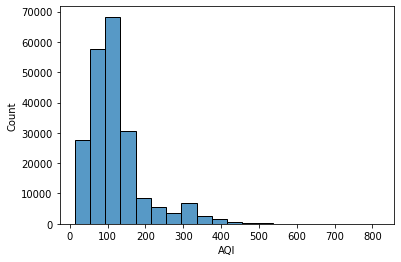

In [ ]:
sns.histplot(df['AQI'], bins=20)
plt.show()

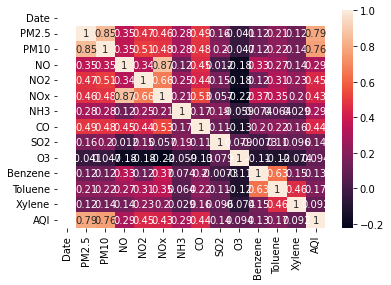

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

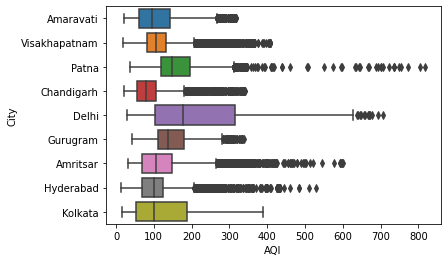

In [ ]:
sns.boxplot(data=df, x='AQI', y='City')
plt.show()

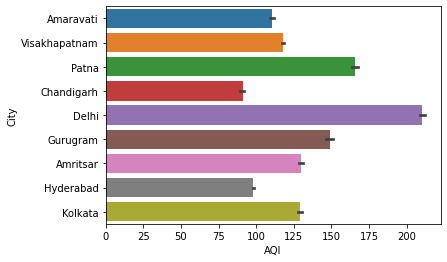

In [ ]:
sns.barplot(data=df, x='AQI', y='City')
plt.show()

In [ ]:
df.dtypes

StationId       object
Date           float64
PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
Benzene        float64
Toluene        float64
Xylene         float64
AQI            float64
AQI_Bucket      object
StationName     object
City            object
State           object
Status          object
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['StationId'] = lab.fit_transform(df['StationId'])

In [ ]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['AQI_Bucket'] = lab.fit_transform(df['AQI_Bucket'])

In [ ]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['StationName'] = lab.fit_transform(df['StationName'])

In [ ]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['City'] = lab.fit_transform(df['City'])

In [ ]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['State'] = lab.fit_transform(df['State'])

In [ ]:

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Status'] = lab.fit_transform(df['Status'])

In [ ]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Date'] = lab.fit_transform(df['Date'])

In [ ]:
#df=df.drop('x',axis=1)

In [ ]:
df.dtypes

StationId        int64
Date             int64
PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
Benzene        float64
Toluene        float64
Xylene         float64
AQI            float64
AQI_Bucket       int64
StationName      int64
City             int64
State            int64
Status           int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214007 entries, 1 to 2650194
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StationId    214007 non-null  int64  
 1   Date         214007 non-null  int64  
 2   PM2.5        214007 non-null  float64
 3   PM10         214007 non-null  float64
 4   NO           214007 non-null  float64
 5   NO2          214007 non-null  float64
 6   NOx          214007 non-null  float64
 7   NH3          214007 non-null  float64
 8   CO           214007 non-null  float64
 9   SO2          214007 non-null  float64
 10  O3           214007 non-null  float64
 11  Benzene      214007 non-null  float64
 12  Toluene      214007 non-null  float64
 13  Xylene       214007 non-null  float64
 14  AQI          214007 non-null  float64
 15  AQI_Bucket   214007 non-null  int64  
 16  StationName  214007 non-null  int64  
 17  City         214007 non-null  int64  
 18  State        214007 non

In [ ]:
# Split the dataset into training and testing sets
X = df.drop('AQI', axis=1)
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,StationName,City,State,Status
25859,1,0,15.0,88.00,13.40,30.72,24.97,7.53,0.76,27.05,5.88,4.22,15.57,2.15,3,7,8,0,0
2625540,16,0,6.8,34.27,6.20,6.62,13.12,3.78,0.39,2.77,11.66,1.54,1.61,0.15,0,1,6,7,0
39998,1,0,52.5,130.25,10.80,63.03,42.30,12.15,0.70,6.50,5.55,7.00,15.65,4.08,3,7,8,0,0
29400,1,0,91.5,94.00,4.60,21.48,13.87,15.45,1.09,18.00,114.98,5.78,6.05,2.40,1,7,8,0,0
2307068,13,0,59.3,145.76,4.67,33.50,21.61,13.43,0.77,10.24,33.22,1.09,8.96,0.95,1,10,5,6,0


In [ ]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 204.95058571355784
R^2 Score: 0.9635163295560503


In [ ]:
# Building from scratch

In [ ]:
# Split the dataset into training and testing sets
X = df.drop('AQI', axis=1)
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Defining a function for entropy
def entropy(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return - (p * np.log2(p) + (1 - p) * np.log2(1-p))

In [ ]:
# Defining a function for information gain
def information_gain(left_child, right_child):
    parent = left_child + right_child
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
    IG_p = entropy(p_parent)
    IG_l = entropy(p_left)
    IG_r = entropy(p_right)
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r

In [ ]:
# Defining the bootstrap
def draw_bootstrap(X_train, y_train):
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace = True))
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    X_bootstrap = X_train.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    X_oob = X_train.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    return X_bootstrap, y_bootstrap, X_oob, y_oob


In [ ]:
# Defining Out-Of-Block Score
def oob_score(tree, X_test, y_test):
    mis_label = 0
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])
        if pred != y_test[i]:
            mis_label += 1
    return mis_label / len(X_test)

In [ ]:
# Function to find the best split
def find_split_point(X_bootstrap, y_bootstrap, max_features):
    feature_ls = list()
    num_features = len(X_bootstrap[0])

    while len(feature_ls) <= max_features:
      feature_idx = random.sample(range(num_features), 1)
      if feature_idx not in feature_ls:
        feature_ls.extend(feature_idx)

    best_info_gain = -999
    node = None
    for feature_idx in feature_ls:
     for split_point in X_bootstrap[:,feature_idx]:
        left_child = {'X_bootstrap': [], 'y_bootstrap': []}
        right_child = {'X_bootstrap': [], 'y_bootstrap': []}

        # split children for continuous variables
        if type(split_point) in [int, float]:
            for i, value in enumerate(X_bootstrap[:,feature_idx]):
                if value <= split_point:
                    left_child['X_bootstrap'].append(X_bootstrap[i])
                    left_child['y_bootstrap'].append(y_bootstrap[i])
                else:
                    right_child['X_bootstrap'].append(X_bootstrap[i])
                    right_child['y_bootstrap'].append(y_bootstrap[i])
        # split children for categoric variables
        else:
            for i, value in enumerate(X_bootstrap[:,feature_idx]):
                if value == split_point:
                    left_child['X_bootstrap'].append(X_bootstrap[i])
                    left_child['y_bootstrap'].append(y_bootstrap[i])
                else:
                    right_child['X_bootstrap'].append(X_bootstrap[i])
                    right_child['y_bootstrap'].append(y_bootstrap[i])

        split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
        if split_info_gain > best_info_gain:
            best_info_gain = split_info_gain
            left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
            right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
            node = {'information_gain': split_info_gain,
                    'left_child': left_child,
                    'right_child': right_child,
                    'split_point': split_point,
                    'feature_idx': feature_idx}


    return node

In [ ]:
# Function to get the terminal node
def terminal_node(node):
    y_bootstrap = node['y_bootstrap']
    pred = max(y_bootstrap, key = y_bootstrap.count)
    return pred

In [ ]:
# Function to find the split node
def split_node(node, max_features, min_samples_split, max_depth, depth):
    left_child = node['left_child']
    right_child = node['right_child']

    del(node['left_child'])
    del(node['right_child'])

    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return

    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node

    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = node['right_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_depth, min_samples_split, max_depth, depth + 1)
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = node['left_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)

In [ ]:
# Function build the tree
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node

In [ ]:
# Defining the Random Forest 

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

In [ ]:
# Defining the function for predict

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

In [ ]:
# Defining the function to fit the model
def predict_rf(tree_ls, X_test):
    pred_ls = list()
    for i in range(len(X_test)):
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]
        final_pred = max(ensemble_preds, key = ensemble_preds.count)
        pred_ls.append(final_pred)
    return np.array(pred_ls)

In [ ]:
# Defining the hyperparameters
n_estimators = 100
max_features = 3
max_depth = 10
min_samples_split = 2



In [ ]:
X_train

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,StationName,City,State,Status
25859,1,0,15.00,88.00,13.40,30.72,24.97,7.53,0.76,27.05,5.88,4.22,15.57,2.15,3,7,8,0,0
2625540,16,0,6.80,34.27,6.20,6.62,13.12,3.78,0.39,2.77,11.66,1.54,1.61,0.15,0,1,6,7,0
39998,1,0,52.50,130.25,10.80,63.03,42.30,12.15,0.70,6.50,5.55,7.00,15.65,4.08,3,7,8,0,0
29400,1,0,91.50,94.00,4.60,21.48,13.87,15.45,1.09,18.00,114.98,5.78,6.05,2.40,1,7,8,0,0
2307068,13,0,59.30,145.76,4.67,33.50,21.61,13.43,0.77,10.24,33.22,1.09,8.96,0.95,1,10,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304061,12,0,13.25,39.75,3.83,34.15,21.30,12.60,0.27,4.75,6.45,2.65,9.05,0.47,0,4,5,6,0
2284789,12,0,77.25,172.75,5.92,77.50,46.02,25.53,0.55,22.07,77.73,16.12,58.28,9.75,1,4,5,6,0
2323634,13,0,86.00,180.00,1.25,41.10,22.87,15.45,0.88,17.80,14.75,0.10,1.42,0.00,1,10,5,6,0
2340622,14,0,60.25,127.25,9.77,57.20,35.12,23.05,1.81,33.52,32.60,0.08,2.92,0.10,1,11,5,6,0


In [ ]:
y_train.head()

25859       79.0
2625540     25.0
39998      100.0
29400      124.0
2307068    131.0
Name: AQI, dtype: float64

In [ ]:
X_train

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,StationName,City,State,Status
25859,1,0,15.00,88.00,13.40,30.72,24.97,7.53,0.76,27.05,5.88,4.22,15.57,2.15,3,7,8,0,0
2625540,16,0,6.80,34.27,6.20,6.62,13.12,3.78,0.39,2.77,11.66,1.54,1.61,0.15,0,1,6,7,0
39998,1,0,52.50,130.25,10.80,63.03,42.30,12.15,0.70,6.50,5.55,7.00,15.65,4.08,3,7,8,0,0
29400,1,0,91.50,94.00,4.60,21.48,13.87,15.45,1.09,18.00,114.98,5.78,6.05,2.40,1,7,8,0,0
2307068,13,0,59.30,145.76,4.67,33.50,21.61,13.43,0.77,10.24,33.22,1.09,8.96,0.95,1,10,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304061,12,0,13.25,39.75,3.83,34.15,21.30,12.60,0.27,4.75,6.45,2.65,9.05,0.47,0,4,5,6,0
2284789,12,0,77.25,172.75,5.92,77.50,46.02,25.53,0.55,22.07,77.73,16.12,58.28,9.75,1,4,5,6,0
2323634,13,0,86.00,180.00,1.25,41.10,22.87,15.45,0.88,17.80,14.75,0.10,1.42,0.00,1,10,5,6,0
2340622,14,0,60.25,127.25,9.77,57.20,35.12,23.05,1.81,33.52,32.60,0.08,2.92,0.10,1,11,5,6,0


In [ ]:
model = random_forest(X_train, y_train, n_estimators=100, max_features=3, max_depth=10, min_samples_split=2)

KeyError: ignored

In [ ]:
preds = predict_rf(model, X_test)
acc = sum(preds == y_test) / len(y_test)
print("Testing accuracy: {}".format(np.round(acc,3)))